# <center> <b> AN ANALYSIS OF THE BANK'S MARKETING CAMPAIGN<br>
    
## <center> <b> <span style="font-size: 1em"> Full name: Pham Hai Ha

<b> <span style="color: #008B8B; font-size: 1.5em;"> TABLE OF CONTENTS
    
* [INTRODUCTION](#0)
* [1. OVERVIEW.](#1) 
    * [1.1. About the dataset.](#1.1.) 
    * [1.2. Literature Review.](#1.2) 
* [2. EXPLORATORY DATA ANALYSIS.](#2) 
    * [2.1. General.](#2.1.) 
    * [2.2. Deposit Visualization.](#2.2) 
    * [2.3. Customer Information.](#2.3)
    * [2.4. Summary.](#2.4)
* [3. MODEL DEVELOPMENT.](#3) 
    * [3.1. Preprocessing.](#3.1)
    * [3.2. Model Building.](#3.2)
    * [3.3. Model Tuning.](#3.3)<br>
* [CONCLUSION.](#4)
* [REFERENCES.](#5)

# Library

pip install xgboost

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 50)  # or 1000

import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline, Pipeline
from imblearn.under_sampling import NearMiss

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import plotly.express as px 

## INTRODUCTION <a class="anchor" id="0"></a>

 In the past few decades, banks have experienced some problems in selling their term-deposit products to new clients (Elsalamony, 2014). This is mainly because it is difficult for banks to figure out who their target customers are and many factors will affect a customer’s decision to purchase a term deposit (Moro et al., 2014). Many banks have started to leverage their substantial customer data to gain insight into customer behavior and buying preferences to address these issues and improve their marketing effectiveness (Moro et al., 2014).  

Marketing data analytics is one of the most prominent applications of data science and machine learning in economics and business. Predicting the outcome of a marketing campaign for each client and clarifying the factors that influence campaign results helps figure out how to execute marketing campaigns more effectively. Understand customer segments, use term deposit customer data to help identify profiles of customers who are more likely to purchase products, and develop marketing campaigns that potential customers. 
    
For that reason, we have been motivated to carry out research on the dataset of the bank's marketing campaign data and performed analytics by using classification technique, especially most known machine learning models, which helps the bank optimize its marketing campaigns to attract more customers to subscribe to term deposits.

## 1. OVERVIEW. <a class="anchor" id="1"></a>

### 1.1. About the dataset. <a id="1.1."></a>

The data is related to direct marketing campaigns (phone calls) of a BankX including 45211 observations, each with 17 attributes. The target y attribute shows the result if clients will subscribe the term deposit or not. The target feature is coded as “yes” to indicate client will subscribe a term deposit while “no” means client will not subscribe the term deposit.<br>
The BankX Marketing Dataset includes information about: <br>
#### Bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical) <br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced / widowed) <br>
4 - education (categorical: "unknown","secondary","primary","tertiary") <br>
5 - default: has credit in default? (binary: "yes","no") <br>
6 - balance: average yearly balance, in euros (numeric) <br>
7 - housing: has housing loan? (binary: "yes","no") <br>
8 - loan: has personal loan? (binary: "yes","no") <br>
#### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - day: last contact day of the month (numeric) <br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") <br>
12 - duration: last contact duration, in seconds (numeric) <br>
#### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

#### Output variable (target value):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### First look at the data

In [3]:
filename = "https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/bank/bankX.csv"
filename 

'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/bank/bankX.csv'

In [4]:
df = pd.read_csv(filename, index_col= 0)
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

- The raw data contains <b> 45211 rows </b> (customers) and <b> 17 columns </b> (features).

### 1.2. Literature Review. <a id="1.2"></a>

There are several previous pieces of research related to Bank Marketing Analysis and features that can be used to build a model to predict the likelihood of customers subscribing to a term deposit.

According to <b>Aleksandra Deis (2019)</b>, the customer's account balance greatly influences the campaign's outcome. People with an account balance above 1490$ are more likely to subscribe for term deposits, so future address those customers. The customer's age affects campaign outcome as well and future campaigns should concentrate on customers from age categories below 30 years old and above 50 years old. The number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4. Deis' finding was that the factors affecting the results of whether customers subscribe to a term deposit or not are customers' account balance, their age, and the number of contact during the campaign.

On the other hand, <b>Bachmann (2019)</b> recognized that the the month of the highest level of marketing activity was the month of May, which means the time period of the call marketing could affect the outcome. In addition, he stated that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients potential clients are the ones in their 20s or younger and 60s or older, people with high balances and longer contacting duration. Those people have a higher probability of subscribing to a term deposit.

## 2. EXPLORATORY DATA ANALYSIS. <a class="anchor" id="2"></a>

#### Modify "deposit" column.

In [5]:
df.rename(columns={"y": "deposit"},inplace=True)
def conditions(df):
    if (df['deposit'] == 'yes'):
        return True
    elif(df['deposit'] == 'no'):
        return False
df['deposit'] = df.apply(conditions, axis = 1)

In [6]:
# shift column 'deposit' to first position
first_column = df.pop('deposit')
  
# insert column using insert(position,column_name, first_column) function
df.insert(0, 'deposit', first_column)

### 2.1. General. <a id="2.1"></a>

#### Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    45211 non-null  bool  
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
dtypes: bool(1), int64(7), object(9)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum().to_frame().T

deposit  age  job  marital  education  default  balance  housing  loan  \
0        0    0    0        0          0        0        0        0     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  
0        0    0      0         0         0      0         0         0

***In the initial look, there are no missing values.***

In [9]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [10]:
df.describe(include=['object'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959

#### <u>Comment</u>: 

In [11]:
df.corr()

deposit       age   balance       day  duration  campaign  \
deposit   1.000000  0.025155  0.052838 -0.028348  0.394521 -0.073172   
age       0.025155  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance   0.052838  0.097783  1.000000  0.004503  0.021560 -0.014578   
day      -0.028348 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration  0.394521 -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign -0.073172  0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays     0.103621 -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous  0.093236  0.001288  0.016674 -0.051710  0.001203 -0.032855   

             pdays  previous  
deposit   0.103621  0.093236  
age      -0.023758  0.001288  
balance   0.003435  0.016674  
day      -0.093044 -0.051710  
duration -0.001565  0.001203  
campaign -0.088628 -0.032855  
pdays     1.000000  0.454820  
previous  0.454820  1.000000

#### <u>Comment</u>: 
- The pairwise correlation among variables is mostly less than **0.1**, which is considered a 'weak' correlation.
- The linear relationship among independent variables and dependent variable "deposit" is also **weak**.

In [12]:
def plotdrawing(feature,x,y):
    plt.figure(figsize=(x,y))
    fig_deposit = sns.histplot(data = df, x = feature, hue = 'deposit', discrete=True, multiple="stack", palette = 'RdBu')
    fig_deposit.set_ylabel('Number of Customers', fontsize = 13)
    fig_deposit.set_xlabel(f'{feature}', fontsize = 13)
    fig_deposit.set_title(f'deposit by {feature}', fontsize = 14)
    for c in fig_deposit.containers:
        labels = [f'{h/df.deposit.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        fig_deposit.bar_label(c, labels=labels, label_type='edge')

In [13]:
def percentsum(feature):
    des = df.groupby([feature])['deposit'].agg(['count', 'sum', 'mean']) 
    des = des.rename(columns = {'count':'TotalCustumers', 'sum':'DepositQuantity', 'mean':'Ratio'}).sort_values(by='Ratio',ascending=False)
    return des

In [14]:
def pdraw(feature,x,y):
    plt.figure(figsize=(x,y))
    fig_deposit = sns.countplot(x=feature, hue='deposit', data = df, palette='RdBu')
    fig_deposit.bar_label(fig_deposit.containers[0])
    fig_deposit.bar_label(fig_deposit.containers[1])
    print(df[feature].value_counts(normalize = True))

### 2.2. Deposit Visualization. <a id="2.2"></a>

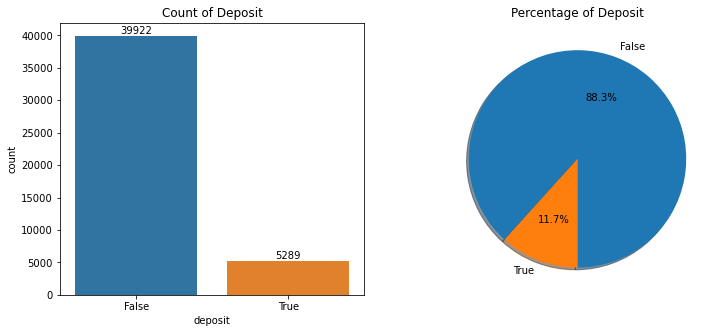

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='deposit',data=df)
ax1.bar_label(ax1.containers[0])
plt.title("Count of Deposit")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Deposit',size = 12)
plt.show()

#### <u>Comment</u>: 
The number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%. As a result, the data is skewed , and our modelling with skeweness could lead to a lot of false negatives. We will use oversampling method to avoid skewness in the modeling section later.

### 2.3. Customer Information. <a id="2.3"></a>

#### 2.3.1. Age.

Text(0.5, 1.0, 'Number of customers by age')

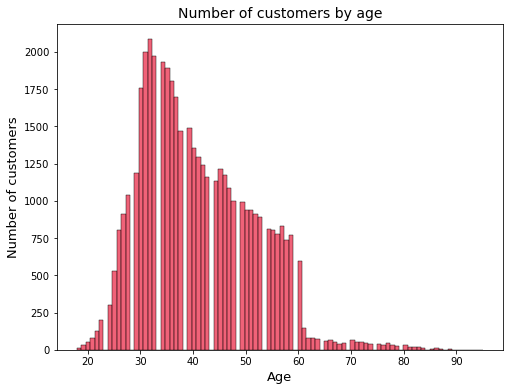

In [16]:
plt.figure(figsize=(8, 6))
age_plt = sns.histplot(data = df[df['age'] <= 100]['age'], color = '#eb2d4b') 
age_plt.set_ylabel('Number of customers', fontsize = 13)
age_plt.set_xlabel('Age', fontsize = 13)
age_plt.set_title('Number of customers by age', fontsize = 14)

#### <u>Comment</u>: 
- The age of the customers using bank services ranges from 18 to 95.
- They are mostly young people, the highest number of customers is in the age of 30s. 

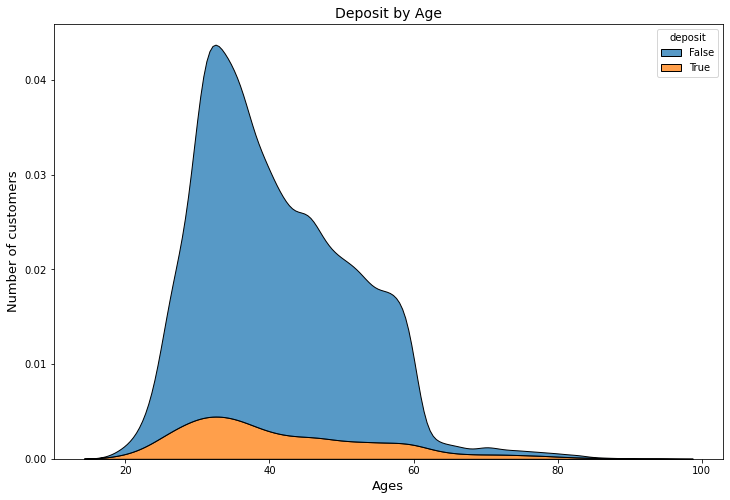

In [17]:
plt.figure(figsize=(12,8))
age_dep = sns.kdeplot(data = df, x = 'age', hue = 'deposit', multiple="stack")
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('Ages', fontsize = 13)
age_dep.set_title('Deposit by Age', fontsize = 14)
plt.show()

We will divide the age into 3 main groups (Adults, Middle-Aged, The Elderly) to see the impact with Churn:

Young Adults          0.516733
Middle-Aged People    0.443808
The Elderly           0.039459
Name: Age Group, dtype: float64


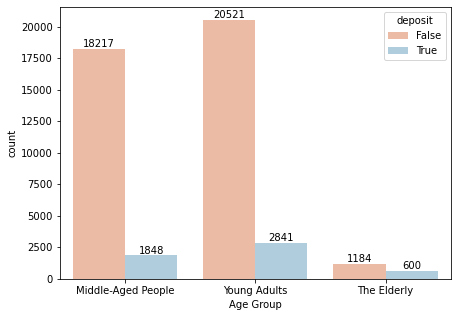

In [18]:
def ages(df):
    if (18 <= df['age'] <= 39) :
        return 'Young Adults'
    elif (40 <= df['age'] <= 59):
        return 'Middle-Aged People'
    elif (60 <= df['age']): 
        return 'The Elderly'
df['Age Group'] = df.apply(ages, axis = 1)
pdraw('Age Group',7,5)

In [19]:
percentsum('Age Group')

TotalCustumers  DepositQuantity     Ratio
Age Group                                                    
The Elderly                   1784              600  0.336323
Young Adults                 23362             2841  0.121608
Middle-Aged People           20065             1848  0.092101

In [20]:
def gens(df):
    if (18 <= df['age'] <= 25) :
        return 'Gen Z'
    elif (25 < df['age'] <= 40):
        return 'Millennials '
    elif (41 <= df['age'] <= 56): 
        return 'Gen X'
    elif (57 <= df['age'] <= 75): 
        return 'Baby Boomers'
    elif (76 <= df['age'] <= 93): 
        return 'Silent Generation'
    elif (94 <= df['age']): 
        return 'Greatest Generation'
df['Generations'] = df.apply(gens, axis = 1)
percentsum('Generations')

TotalCustumers  DepositQuantity     Ratio
Generations                                                   
Silent Generation               258              116  0.449612
Greatest Generation               3                1  0.333333
Gen Z                          1336              320  0.239521
Baby Boomers                   3861              721  0.186739
Millennials                   23381             2637  0.112784
Gen X                         16372             1494  0.091253

#### <u>Comment</u>:
- Most customers are Young Adults and Middle-Aged People and they have not so high deposit percentages, at around 9-12%.
- The Elderly group, though with relatively small quantity, has the highest percentage of deposit customers.
=> Therefore, age group could be a potential feature to predict deposit customers.
- When ages are classified into generations, Silent Generation, Greatest Generation, Gen Z are people who are likely to subscribe to a deposit the most.
*Note that the size of the Greatest Generation is too small to conclude.* 

#### 2.3.2. Job.

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


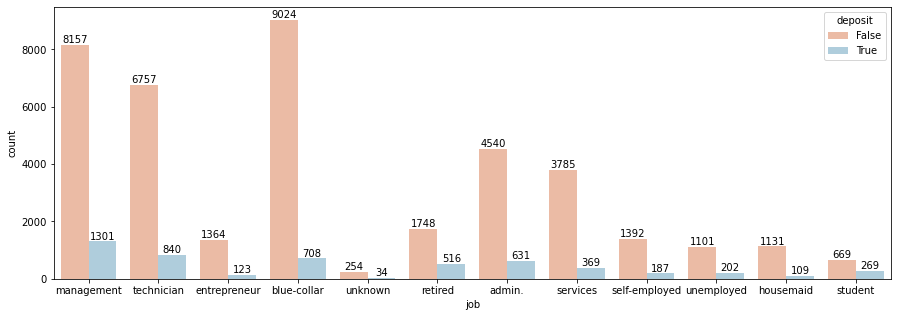

In [21]:
pdraw('job',15,5)

Text(0.5, 1.0, 'Jobs by Age')

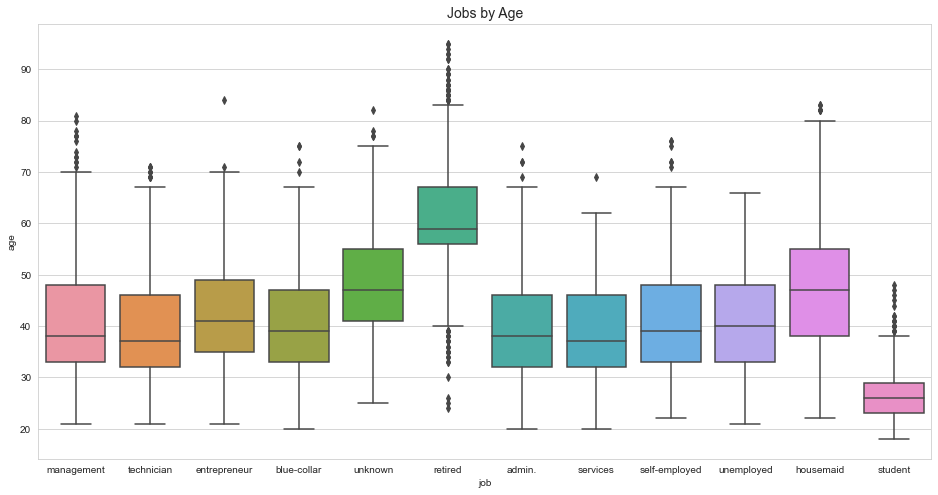

In [22]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
ax= sns.boxplot(x='job',y='age',data=df)
ax.set_title('Jobs by Age', fontsize = 14)

> - Retired people are mostly at the age of above 55 and most students are at the age of 20s.

In [23]:
percentsum('job')

TotalCustumers  DepositQuantity     Ratio
job                                                     
student                   938              269  0.286780
retired                  2264              516  0.227915
unemployed               1303              202  0.155027
management               9458             1301  0.137556
admin.                   5171              631  0.122027
self-employed            1579              187  0.118429
unknown                   288               34  0.118056
technician               7597              840  0.110570
services                 4154              369  0.088830
housemaid                1240              109  0.087903
entrepreneur             1487              123  0.082717
blue-collar              9732              708  0.072750

#### <u>Comment</u>:
- Most common job titles are blue-collar, technician and admin.
- However, in terms of Deposit rate, students and retired people are more likely to deposit than others; and regarding quantity, management is the job having the largest number with 1301 clients.

In [24]:
def Job_Cate(df):
    if df['job'] == 'admin.' or df['job'] == 'blue-collar' or df['job'] == 'employed' or df['job'] == 'entrepreneur' or df['job'] == 'housemaid' or df['job'] == 'management' or df['job'] == 'services' or df['job'] == 'technician':
        return 'employed'
    elif df['job'] == 'retired':
        return 'retired'
    elif df['job'] == 'self-employed':
        return 'self-employed'
    elif df['job'] == 'student':
        return 'student'
    elif df['job'] == 'unemployed':
        return 'unemployed'
df['Job_Cate'] = df.apply(Job_Cate, axis = 1)
percentsum('Job_Cate')

TotalCustumers  DepositQuantity     Ratio
Job_Cate                                                
student                   938              269  0.286780
retired                  2264              516  0.227915
unemployed               1303              202  0.155027
self-employed            1579              187  0.118429
employed                38839             4081  0.105075

#### 3.2.3. Marital status. 

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


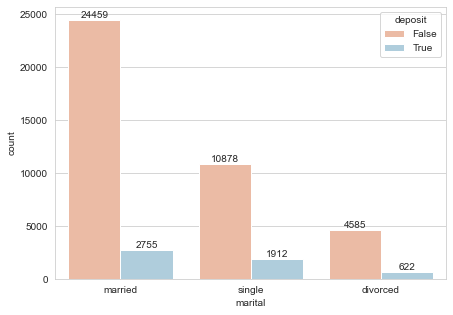

In [25]:
pdraw('marital',7,5)

In [26]:
percentsum('marital')

TotalCustumers  DepositQuantity     Ratio
marital                                            
single             12790             1912  0.149492
divorced            5207              622  0.119455
married            27214             2755  0.101235

#### <u>Comment</u>:
- The majority of customers are in married status.
- There are no apparent deposit rate differences among the 3 types of marital status.
- Single status has 3% higher ratio to do loans than married and divorced category. It seems marital status and responsibility affect the loans rate.

#### 2.3.4. Education levels. 

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


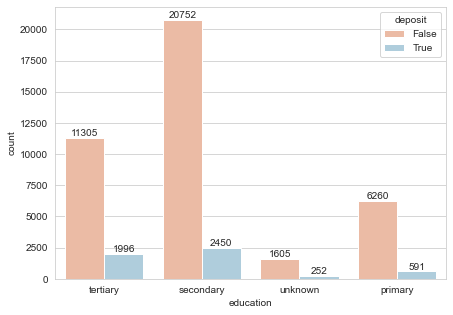

In [27]:
pdraw('education',7,5)

In [28]:
percentsum('education')

TotalCustumers  DepositQuantity     Ratio
education                                           
tertiary            13301             1996  0.150064
unknown              1857              252  0.135703
secondary           23202             2450  0.105594
primary              6851              591  0.086265

#### <u>Comment</u>:
- Customers with secondary education levels accounted for the highest proportion; however, tertiary is the level with the highest deposit customer percentage (15%).
- The trends go down with the lower education. So it can be assumed that the higher the education, the greater the tendency of a person to subscribe.

#### 2.3.5. Default, Housing and Loan. 

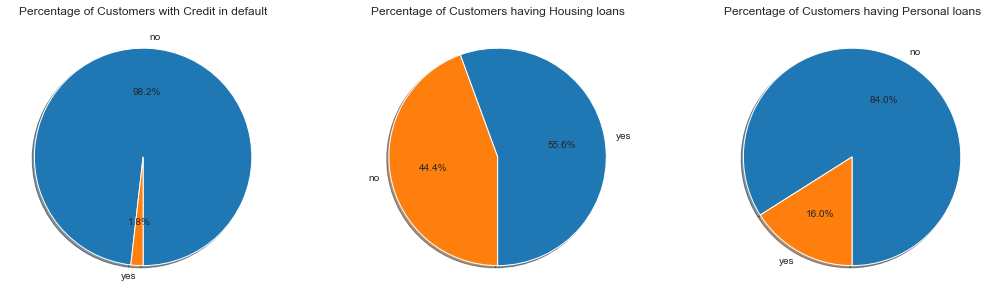

In [29]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
labels =df['default'].value_counts(sort = 'yes').index
sizes = df['default'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers with Credit in default',size = 12)

plt.subplot(1,3,2)
labels =df['housing'].value_counts(sort = 'yes').index
sizes = df['housing'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers having Housing loans',size = 12)

plt.subplot(1,3,3)
labels =df['loan'].value_counts(sort = 'yes').index
sizes = df['loan'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers having Personal loans',size = 12)
plt.show()

#### <u>Comment</u>:
- People with Credit in default account for the majority of the total customers (**98.2%**).

***Default and Deposit***

In [30]:
percentsum('default')

TotalCustumers  DepositQuantity     Ratio
default                                           
no                44396             5237  0.117961
yes                 815               52  0.063804

***Housing and Deposit***

In [31]:
percentsum('housing')

TotalCustumers  DepositQuantity     Ratio
housing                                           
no                20081             3354  0.167024
yes               25130             1935  0.077000

***Loan and Deposit***

In [32]:
percentsum('loan')

TotalCustumers  DepositQuantity     Ratio
loan                                           
no             37967             4805  0.126557
yes             7244              484  0.066814

#### <u>Comment</u>:
Customers with <b>no Credit in default</b> or <b>not having Housing loans</b> or <b>not having Personal loans</b> have <b><i>twice</b></i> the tendency of subscribing to a term deposit compared to ones with default or loans.

#### 2.3.6. Balance. 

***Balance***

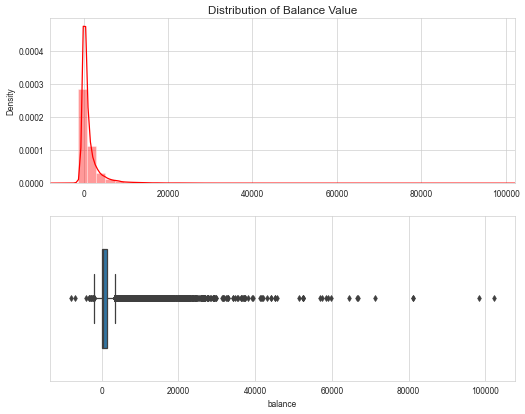

In [33]:
fig, [ax0,ax1] = plt.subplots(2, figsize=(10,8), dpi=60)

balance_val = df['balance'].values

sns.distplot(balance_val, color='r', ax=ax0)
ax0.set_title('Distribution of Balance Value', fontsize=14)
ax0.set_xlim([min(balance_val), max(balance_val)])

sns.boxplot(df['balance'], ax=ax1, width=0.6)

plt.show()

#### <u>Comment</u>:
- The average yearly balance of customers given is diverse and considered quite low, which is mostly less than **€1000** per year. 

***Balance and Age.***

Text(0, 0.5, 'balance')

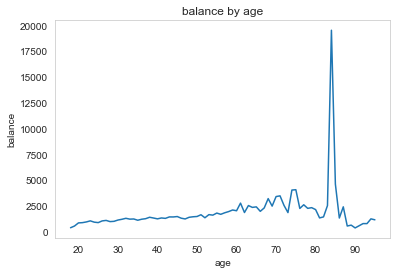

In [34]:
plt.plot(df.groupby('age').mean()['balance'])
plt.grid()

plt.title('balance by age')
plt.xlabel('age')
plt.ylabel('balance') 

<AxesSubplot:xlabel='Age Group', ylabel='balance'>

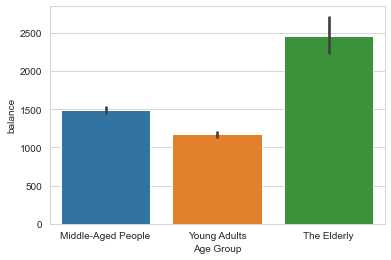

In [35]:
sns.barplot('Age Group','balance', data = df) 

#### <u>Comment</u>:
According to the graph, it can be seen that those in their 60s and older have the largest balance of around 2500 or more. Since the second largest age group is between 30s and 60s, it can be estimated that the older customers have a higher balance.

***Balance and Job.***

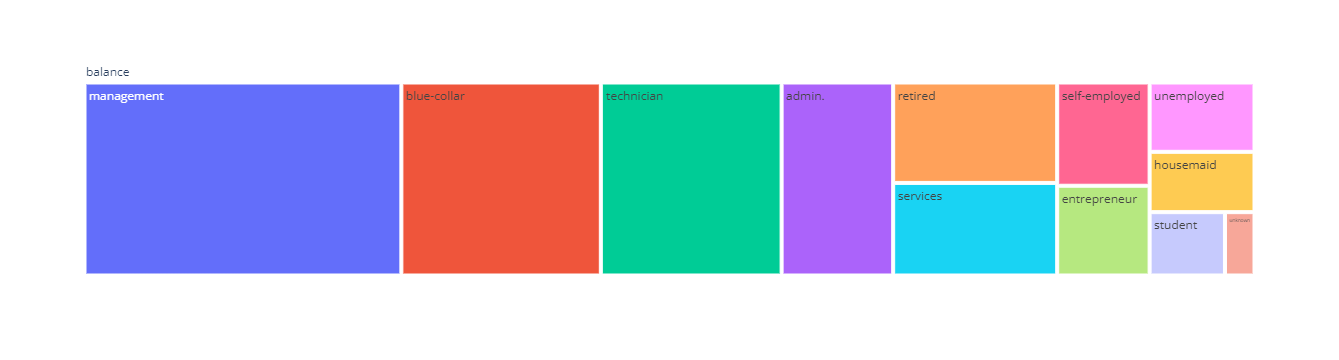

In [36]:
fig = px.treemap(df, path=[px.Constant('balance'),'job'], values='balance',
                   hover_data=['job'])

fig.show()

In [37]:
df.groupby(['job'])['balance'].mean().to_frame().sort_values(by='balance', ascending=False)

balance
job                       
retired        1984.215106
unknown        1772.357639
management     1763.616832
self-employed  1647.970868
unemployed     1521.745971
entrepreneur   1521.470074
housemaid      1392.395161
student        1388.060768
technician     1252.632092
admin.         1135.838909
blue-collar    1078.826654
services        997.088108

#### <u>Comment</u>:
- Retired customers have the highest balance value whereas the lowest value is occupied by those who do services.
- It is significant that people who holds Management position are higher earners, while administrators, blue-collar workers and services staff generally have low income.

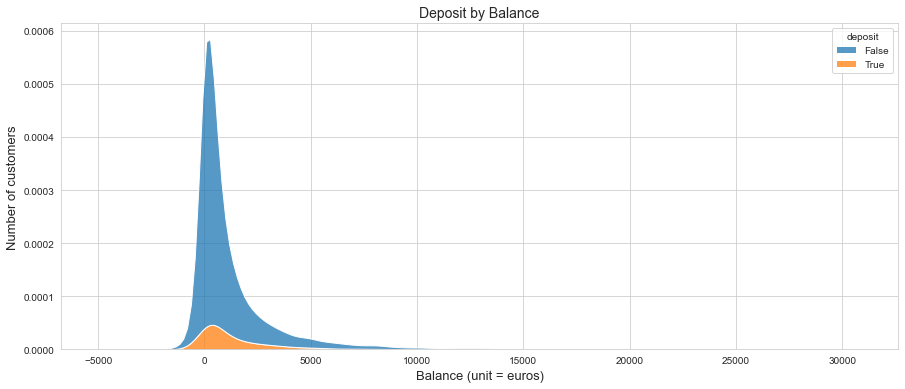

In [38]:
plt.figure(figsize=(15,6))
bal_dep = sns.kdeplot(x = df['balance'].loc[(df['balance']<=30000)&(df['balance']>=-5000)], hue = df['deposit'], multiple="stack")
bal_dep.set_ylabel('Number of customers', fontsize = 13)
bal_dep.set_xlabel('Balance (unit = euros)', fontsize = 13)
bal_dep.set_title('Deposit by Balance', fontsize = 14)
plt.show()

In [39]:
def Balance_Cate(df):
    if (df['balance'] < 0) :
        return 'Negative Balance'
    elif (0 <= df['balance'] < 500):
        return 'Low Balance'
    elif (500 <= df['balance'] < 1500):
        return 'Average Balance'
    elif (1500 <= df['balance'] < 4000): 
        return 'High Balance'
    elif (4000 <= df['balance']): 
        return 'Very High Balance'
df['Balance_Cate'] = df.apply(Balance_Cate, axis = 1)

In [40]:
percentsum('Balance_Cate')

TotalCustumers  DepositQuantity     Ratio
Balance_Cate                                                
High Balance                 7002             1160  0.165667
Very High Balance            3899              618  0.158502
Average Balance             10673             1329  0.124520
Low Balance                 19871             1972  0.099240
Negative Balance             3766              210  0.055762

#### <u>Comment</u>:
- There is a tendency to have higher chance of subscribing to a deposit when the customers have higher balance.

#### 2.3.7. Contact. 

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


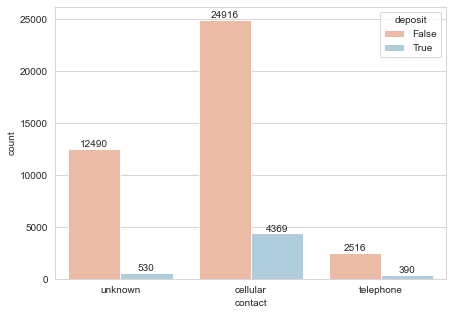

In [41]:
pdraw('contact',7,5)

In [42]:
percentsum('contact')

TotalCustumers  DepositQuantity     Ratio
contact                                             
cellular            29285             4369  0.149189
telephone            2906              390  0.134205
unknown             13020              530  0.040707

#### <u>Comment</u>:
- Customers contacted by unknown contacts are more likely to not deposit, only 4% of them deposited.

#### 2.3.8. Day and Month. 

In [43]:
df['month'] = df['month'].str.capitalize()
df['day'] = df['day'].astype(str).str.zfill(2)
df['Last_contact_day'] = df['day'].astype(str) + '-' + df['month']
df['Last_contact_day']  =  pd.to_datetime(df['Last_contact_day'], format='%d-%b')
df['Last_contact_day'] = df['Last_contact_day'].dt.dayofyear

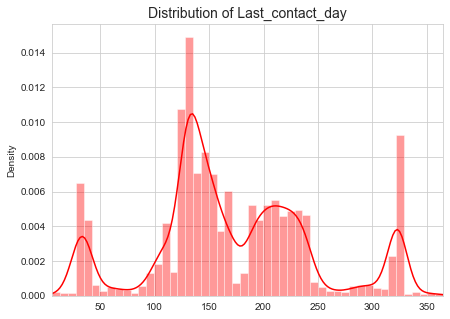

In [44]:
fig, ax1 = plt.subplots(1, figsize = (7,5))

C_date_val = df['Last_contact_day'].values

sns.distplot(C_date_val, ax=ax1, color='r')
ax1.set_title('Distribution of Last_contact_day', fontsize=14)
ax1.set_xlim([min(C_date_val), max(C_date_val)])

plt.show()

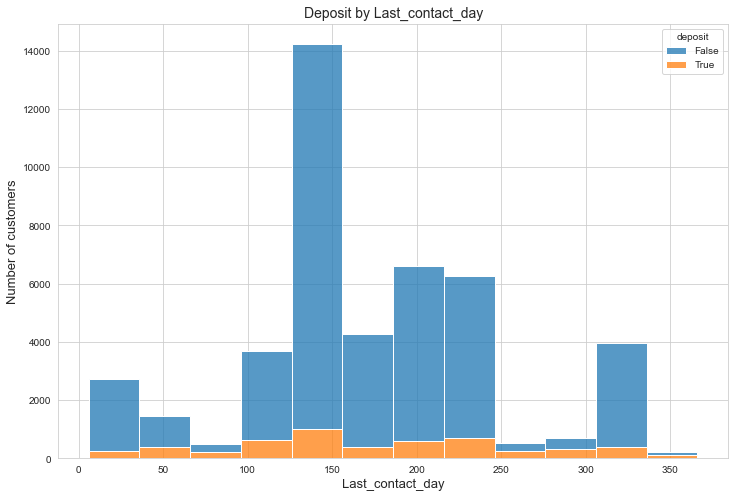

In [45]:
plt.figure(figsize=(12,8))
age_dep = sns.histplot(data = df, x = 'Last_contact_day', hue = 'deposit', multiple="stack",binwidth=30)
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('Last_contact_day', fontsize = 13)
age_dep.set_title('Deposit by Last_contact_day', fontsize = 14)
plt.show()

In [46]:
percentsum('month')

TotalCustumers  DepositQuantity     Ratio
month                                           
Mar               477              248  0.519916
Dec               214              100  0.467290
Sep               579              269  0.464594
Oct               738              323  0.437669
Apr              2932              577  0.196794
Feb              2649              441  0.166478
Aug              6247              688  0.110133
Jun              5341              546  0.102228
Nov              3970              403  0.101511
Jan              1403              142  0.101212
Jul              6895              627  0.090935
May             13766              925  0.067195

#### <u>Comment</u>:
- Regarding months, the highest volume of customers occurs during **May**. However, this month also saw to the lowest conversion rate, meaning the promoted customers choose to reject the subscription. Hence, the bank should reallocate resources to other months that effective rate is high, such as **March, December, September and October**. Note that the month of December requires further investigation due to small sample size. 

→ Contact time could be a potential variable to predict.

#### 2.3.9. Duration, Campaign, Pdays, and Previous. 

<AxesSubplot:xlabel='previous'>

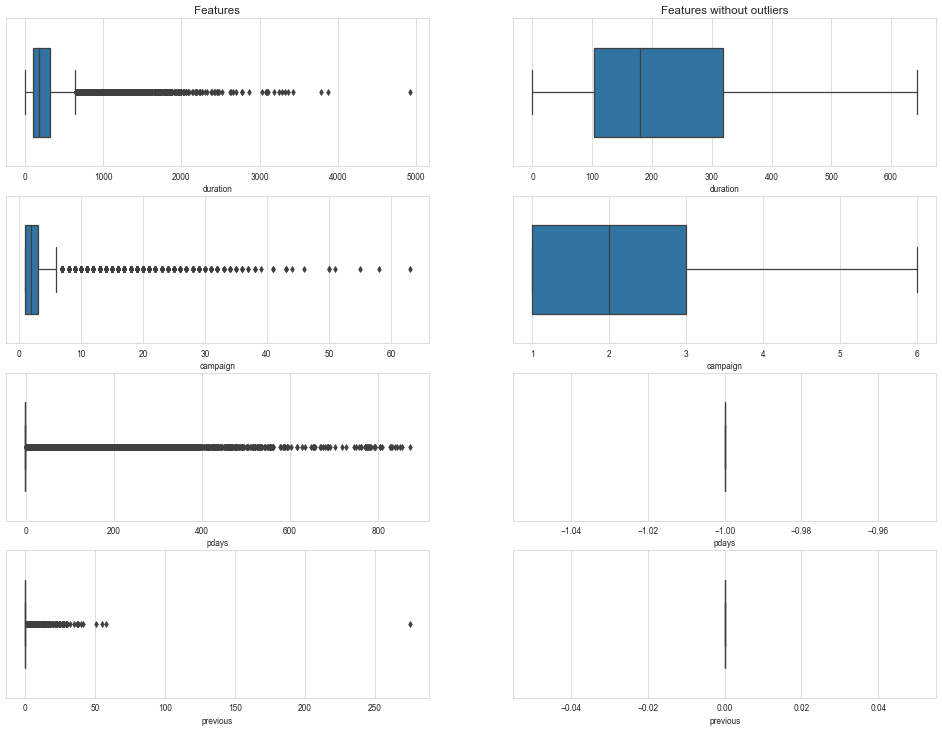

In [47]:
fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]]= plt.subplots(ncols=2, nrows=4, figsize = (20,15), dpi=60)

sns.boxplot(df['duration'], ax=ax1, width=0.6)
ax1.set_title('Features', fontsize=14)
sns.boxplot(df['duration'], ax=ax2, width=0.6, showfliers = False)
ax2.set_title('Features without outliers', fontsize=14)
sns.boxplot(df['campaign'], ax=ax3, width=0.6)
sns.boxplot(df['campaign'], ax=ax4, width=0.6, showfliers = False)
sns.boxplot(df['pdays'], ax=ax5, width=0.6)
sns.boxplot(df['pdays'], ax=ax6, width=0.6, showfliers = False)
sns.boxplot(df['previous'], ax=ax7, width=0.6)
sns.boxplot(df['previous'], ax=ax8, width=0.6, showfliers = False)

> <p> These variables are clearly right skewed. <br>
> There are a lot of outliers for these 3 variables, which may need removing in proper way to avoid deleting removing important values. </p>

***Duration***

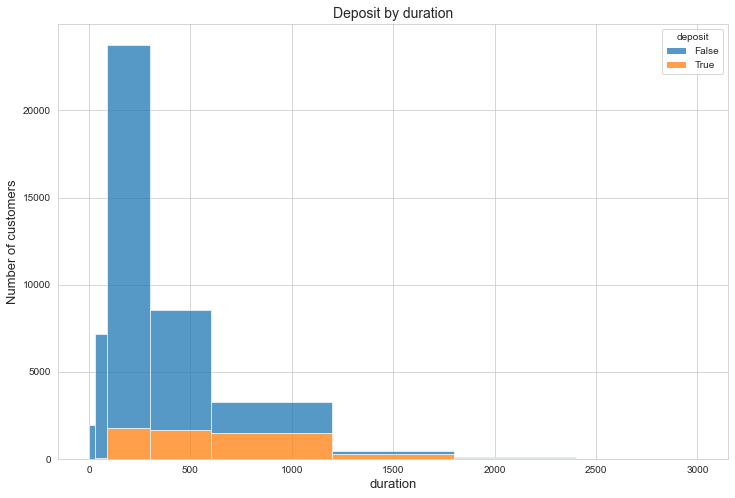

In [48]:
plt.figure(figsize=(12,8))
bins=[-1,30,90,300,600,1200,1800,2400,3000]
age_dep = sns.histplot(x = df['duration'].loc[df['duration']<=3000], hue = df['deposit'], multiple="stack",bins=bins)
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('duration', fontsize = 13)
age_dep.set_title('Deposit by duration', fontsize = 14)
plt.show()

In [49]:
bins = [-1,30,90,300,600,1200,1800,2400,3000,4918]
labels =['0-30','30-90','90-300','300-600','600-1200','1200-1800','1800-2400','2400-3000','3000-']
df['binned_duration'] = pd.cut(df['duration'], bins,labels=labels)
percentsum('binned_duration')

TotalCustumers  DepositQuantity     Ratio
binned_duration                                           
2400-3000                    15               10  0.666667
1200-1800                   453              291  0.642384
1800-2400                    78               39  0.500000
600-1200                   3230             1487  0.460372
3000-                        14                6  0.428571
300-600                    8484             1625  0.191537
90-300                    23648             1762  0.074509
30-90                      7279               64  0.008792
0-30                       2010                5  0.002488

#### <u>Comment</u>: 
- Regarding duration, the highest volume of customers occurs with the range from **90-300**.
- The highest ratio to accept the subscription is in accordance with the range **2400-3000**. However, this duration requires further investigation due to small sample size (only **15** customer).
- There is a tendency that longer the duration is, higher probability customers decide to subscribe a term deposit, except for duration of over 3000, which seems to be outliers. 

***Campaign***

In [50]:
bins = [0,1,5,10,30,50,63]
labels =['1','2-5','6-10','11-30','31-50','51-']
df['binned_campaign'] = pd.cut(df['campaign'], bins,labels=labels)
percentsum('binned_campaign')

TotalCustumers  DepositQuantity     Ratio
binned_campaign                                           
1                         17544             2561  0.145976
2-5                       23312             2475  0.106168
6-10                       3159              206  0.065211
11-30                      1137               46  0.040457
31-50                        55                1  0.018182
51-                           4                0  0.000000

#### <u>Comment</u>:
- From the statistics, we can conclude that less contacts during the campaign, higher probability customers subscribe a term deposit.

***Pdays***

In [51]:
bins = [-2,0,30,90,180,365,730,872]
labels =['-1','0-30','30-90','90-180','180-360','360-730','730-']
df['binned_pdays'] = pd.cut(df['pdays'], bins,labels=labels)
percentsum('binned_pdays')

TotalCustumers  DepositQuantity     Ratio
binned_pdays                                           
30-90                    530              223  0.420755
730-                      30               12  0.400000
360-730                  613              176  0.287113
90-180                  2480              680  0.274194
180-360                 4416              786  0.177989
0-30                     188               28  0.148936
-1                     36954             3384  0.091573

#### <u>Comment</u>:
- After **30-90 days** from the last contact of previous campaign, customers tend to accept the offer to subscribe when they are contacted again in the current campaign.
- If customers are never contacted, they will be likely to reject the subscription.

***Previous***

In [52]:
bins = [-1,0,1,5,20,50,100,275]
labels =['0','1','2-5','6-20','21-50','51-100','101-']
df['binned_previous'] = pd.cut(df['previous'], bins,labels=labels)
percentsum('binned_previous')

TotalCustumers  DepositQuantity     Ratio
binned_previous                                           
51-100                        3                2  0.666667
6-20                       1009              272  0.269574
2-5                        4421             1042  0.235693
1                          2772              583  0.210317
21-50                        51                6  0.117647
0                         36954             3384  0.091573
101-                          1                0  0.000000

#### <u>Comment</u>:
- Clients who got about **51-100** contacts from previous campaigns tend to agree with the subscription, but the number of customer is only 3, while others with **no** contacts tend to refuse the deposit; About more than 100 contacts, this values could be outliers

*Note that the sample size of the range 51-100 is small and it requires further investigation*

#### 2.3.10. Poutcome. 

In [53]:
df['poutcome'] = df['poutcome'].replace(['unknown'], 'other')

other      0.858176
failure    0.108403
success    0.033421
Name: poutcome, dtype: float64


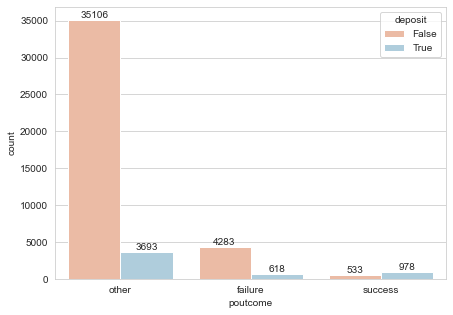

In [54]:
pdraw('poutcome',7,5)

In [55]:
percentsum('poutcome')

TotalCustumers  DepositQuantity     Ratio
poutcome                                           
success             1511              978  0.647253
failure             4901              618  0.126097
other              38799             3693  0.095183

#### <u>Comment</u>:
- The outcome of the previous campaign has an influential impact on the current one while the successful previous campaign will lead to a higher percentage of customers who accept the subscription for a term deposit.

*Note that the sample size of **"other"** group is quite large, therefore furthere investigation is needed to assure the conclusion above.*

### 2.4. Summary. <a id="2.4"></a>

***After performing EDA, we have had some potential features which will be used to develop models:***
<br>age, job, marital, education, default, balance, housing, loan, Last_contact_day, duration, campaign, pdays, previous, poutcome

## 3. Model Development <a class="anchor" id="3"></a>

From the <b>Literature Review</b> and the <b>abovementioned potential features</b> in the EDA part, we have the model development with the following variables:
 - age
 - job
 - marital
 - education
 - default
 - balance
 - housing
 - loan
 - Last_contact_day
 - duration
 - campaign
 - pdays
 - previous
 - poutcome

### 3.1. Preprocessing. <a id="3.1"></a>

In [56]:
import copy
df_copy = copy.deepcopy(df)

In [57]:
df_copy.loc[(df_copy['job'] == 'unknown') & (df_copy['age'] >= 60), "job"] = 'retired'
df_copy.loc[(df_copy['job'] == 'unknown') & (df_copy['age'] < 60), "job"] = 'blue-collar'

df_copy['Job_Cate'].fillna('employed', inplace=True)
df_copy['job'].replace(['unknown'], 'blue-collar', inplace=True)

df_copy['education'].replace('unknown', 'secondary', inplace=True)
df_copy['education'].replace('primary', 1, inplace=True)
df_copy['education'].replace('secondary', 2, inplace=True)
df_copy['education'].replace('tertiary', 3, inplace=True)

In [58]:
# Drop outliners
df_copy.drop(df_copy[(df_copy['duration']>3000)].index, inplace = True)
df_copy = df_copy.reset_index(drop= True)

In [59]:
# Drop unnecessary columns 
df_copy.drop(['Generations', 'day', 'month', 'Age Group', 'Job_Cate', 'Balance_Cate', 'binned_duration', 'binned_campaign', 'binned_pdays', 'binned_previous','contact'], axis=1, inplace=True)
df_copy

deposit  age           job   marital  education default  balance  \
0        False   58    management   married          3      no     2143   
1        False   44    technician    single          2      no       29   
2        False   33  entrepreneur   married          2      no        2   
3        False   47   blue-collar   married          2      no     1506   
4        False   33   blue-collar    single          2      no        1   
...        ...  ...           ...       ...        ...     ...      ...   
45192     True   51    technician   married          3      no      825   
45193     True   71       retired  divorced          1      no     1729   
45194     True   72       retired   married          2      no     5715   
45195    False   57   blue-collar   married          2      no      668   
45196    False   37  entrepreneur   married          2      no     2971   

      housing loan  duration  campaign  pdays  previous poutcome  \
0         yes   no       261         1     -1         0    other   
1         yes   no       151         1     -1         0    other   
2         yes  yes        76         1     -1         0    other   
3         yes   no        92         1     -1         0    other   
4          no   no       198         1     -1         0    other   
...       ...  ...       ...       ...    ...       ...      ...   
45192      no   no       977         3     -1         0    other   
45193      no   no       456         2     -1         0    other   
45194      no   no      1127         5    184         3  success   
45195      no   no       508         4     -1         0    other   
45196      no   no       361         2    188        11    other   

       Last_contact_day  
0                   125  
1                   125  
2                   125  
3                   125  
4                   125  
...                 ...  
45192               321  
45193               321  
45194               321  
45195               321  
45196               321  

[45197 rows x 15 columns]

#### One-hot encode categorical features

In [60]:
encoder = OneHotEncoder(drop='if_binary', sparse=False)
dic1 = encoder.fit_transform(df_copy[['job', 'marital', 'default', 'housing', 'loan', 'poutcome']])

In [61]:
lst = encoder.get_feature_names_out(['job', 'marital', 'default', 'housing', 'loan', 'poutcome']) 
out = pd.DataFrame(dic1, columns=lst)
out.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               1.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             1.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0             0.0             0.0               0.0              1.0   
1             1.0             0.0               0.0              0.0   
2             0.0             0.0               0.0              1.0   
3             0.0             0.0               0.0              1.0   
4             0.0             0.0               0.0              0.0   

   marital_single  default_yes  housing_yes  loan_yes  poutcome_failure  \
0             0.0          0.0          1.0       0.0               0.0   
1             1.0          0.0          1.0       0.0               0.0   
2             0.0          0.0          1.0       1.0               0.0   
3             0.0          0.0          1.0       0.0               0.0   
4             1.0          0.0          0.0       0.0               0.0   

   poutcome_other  poutcome_success  
0             1.0               0.0  
1             1.0               0.0  
2             1.0               0.0  
3             1.0               0.0  
4             1.0               0.0

In [62]:
df_dummies = pd.concat([df_copy, out], axis=1)
df_dummies['deposit']=df_dummies['deposit'].map({False:0,True:1})
df_dummies.head()

deposit  age           job  marital  education default  balance housing  \
0        0   58    management  married          3      no     2143     yes   
1        0   44    technician   single          2      no       29     yes   
2        0   33  entrepreneur  married          2      no        2     yes   
3        0   47   blue-collar  married          2      no     1506     yes   
4        0   33   blue-collar   single          2      no        1      no   

  loan  duration  campaign  pdays  previous poutcome  Last_contact_day  \
0   no       261         1     -1         0    other               125   
1   no       151         1     -1         0    other               125   
2  yes        76         1     -1         0    other               125   
3   no        92         1     -1         0    other               125   
4   no       198         1     -1         0    other               125   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               1.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             1.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0             0.0             0.0               0.0              1.0   
1             1.0             0.0               0.0              0.0   
2             0.0             0.0               0.0              1.0   
3             0.0             0.0               0.0              1.0   
4             0.0             0.0               0.0              0.0   

   marital_single  default_yes  housing_yes  loan_yes  poutcome_failure  \
0             0.0          0.0          1.0       0.0               0.0   
1             1.0          0.0          1.0       0.0               0.0   
2             0.0          0.0          1.0       1.0               0.0   
3             0.0          0.0          1.0       0.0               0.0   
4             1.0          0.0          0.0       0.0               0.0   

   poutcome_other  poutcome_success  
0             1.0               0.0  
1             1.0               0.0  
2             1.0               0.0  
3             1.0               0.0  
4             1.0               0.0

#### Removal of unnecessary variables

In [63]:
df_dummies.drop(['job', 'marital', 'default', 'housing', 'loan', 'poutcome'], inplace = True, axis = 1)
df_dummies

deposit  age  education  balance  duration  campaign  pdays  previous  \
0            0   58          3     2143       261         1     -1         0   
1            0   44          2       29       151         1     -1         0   
2            0   33          2        2        76         1     -1         0   
3            0   47          2     1506        92         1     -1         0   
4            0   33          2        1       198         1     -1         0   
...        ...  ...        ...      ...       ...       ...    ...       ...   
45192        1   51          3      825       977         3     -1         0   
45193        1   71          1     1729       456         2     -1         0   
45194        1   72          2     5715      1127         5    184         3   
45195        0   57          2      668       508         4     -1         0   
45196        0   37          2     2971       361         2    188        11   

       Last_contact_day  job_admin.  job_blue-collar  job_entrepreneur  \
0                   125         0.0              0.0               0.0   
1                   125         0.0              0.0               0.0   
2                   125         0.0              0.0               1.0   
3                   125         0.0              1.0               0.0   
4                   125         0.0              1.0               0.0   
...                 ...         ...              ...               ...   
45192               321         0.0              0.0               0.0   
45193               321         0.0              0.0               0.0   
45194               321         0.0              0.0               0.0   
45195               321         0.0              1.0               0.0   
45196               321         0.0              0.0               1.0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                0.0             1.0          0.0                0.0   
1                0.0             0.0          0.0                0.0   
2                0.0             0.0          0.0                0.0   
3                0.0             0.0          0.0                0.0   
4                0.0             0.0          0.0                0.0   
...              ...             ...          ...                ...   
45192            0.0             0.0          0.0                0.0   
45193            0.0             0.0          1.0                0.0   
45194            0.0             0.0          1.0                0.0   
45195            0.0             0.0          0.0                0.0   
45196            0.0             0.0          0.0                0.0   

       job_services  job_student  job_technician  job_unemployed  \
0               0.0          0.0             0.0             0.0   
1               0.0          0.0             1.0             0.0   
2               0.0          0.0             0.0             0.0   
3               0.0          0.0             0.0             0.0   
4               0.0          0.0             0.0             0.0   
...             ...          ...             ...             ...   
45192           0.0          0.0             1.0             0.0   
45193           0.0          0.0             0.0             0.0   
45194           0.0          0.0             0.0             0.0   
45195           0.0          0.0             0.0             0.0   
45196           0.0          0.0             0.0             0.0   

       marital_divorced  marital_married  marital_single  default_yes  \
0                   0.0              1.0             0.0          0.0   
1                   0.0              0.0             1.0          0.0   
2                   0.0              1.0             0.0          0.0   
3                   0.0              1.0             0.0          0.0   
4                   0.0              0.0             1.0          0.0   
...                 ...              

### 3.2. Model Building. <a id="3.2"></a>

The target value is "deposit", a "Yes/No" variable. Therefore, Classification predictive models or Binary Classification Algorithms are suitable for developing the models.<br>
In this report, the authors decided to use some popular models, which are:
- Logistic Regression.
- Decision Trees.
- Random Forest.
- Extreme Gradient Boosting.

In [64]:
def metrics_scoring_table(y_model,y_true, y_proba, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    roc = roc_auc_score(y_true, y_proba[:, 1])
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1-score": f1,
    "ROC-AUC": roc
    },
    index = [0]
    )
    return df_score

In [65]:
def roc_curve_plot(Y_pred, Y_true, Y_pred_pobablities, model_name):
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )
    
    fig, ax = plt.subplots(nrows=1, ncols= 1, figsize = (7,5), constrained_layout = True)
    ax.plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)))
    ax.set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax.set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax.set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax.legend(loc = 4, fontsize = 14 )

    plt.show()
    

In [66]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("ROC scores summary", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} ROC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
    plt.show()

> ROC Curve (Receiver Operating Characteristic):
The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

In [67]:
X = df_dummies.drop('deposit', axis=1)
Y = df_dummies['deposit']

#### Splitting the dataset into the Training set and Test set.

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

#### Oversampling.

In [69]:
SM = SMOTE(sampling_strategy = 1, k_neighbors= 5)

In [70]:
X_train, Y_train = SM.fit_resample(X_train, Y_train)

#### Multicollinearity Detecting.

<AxesSubplot:>

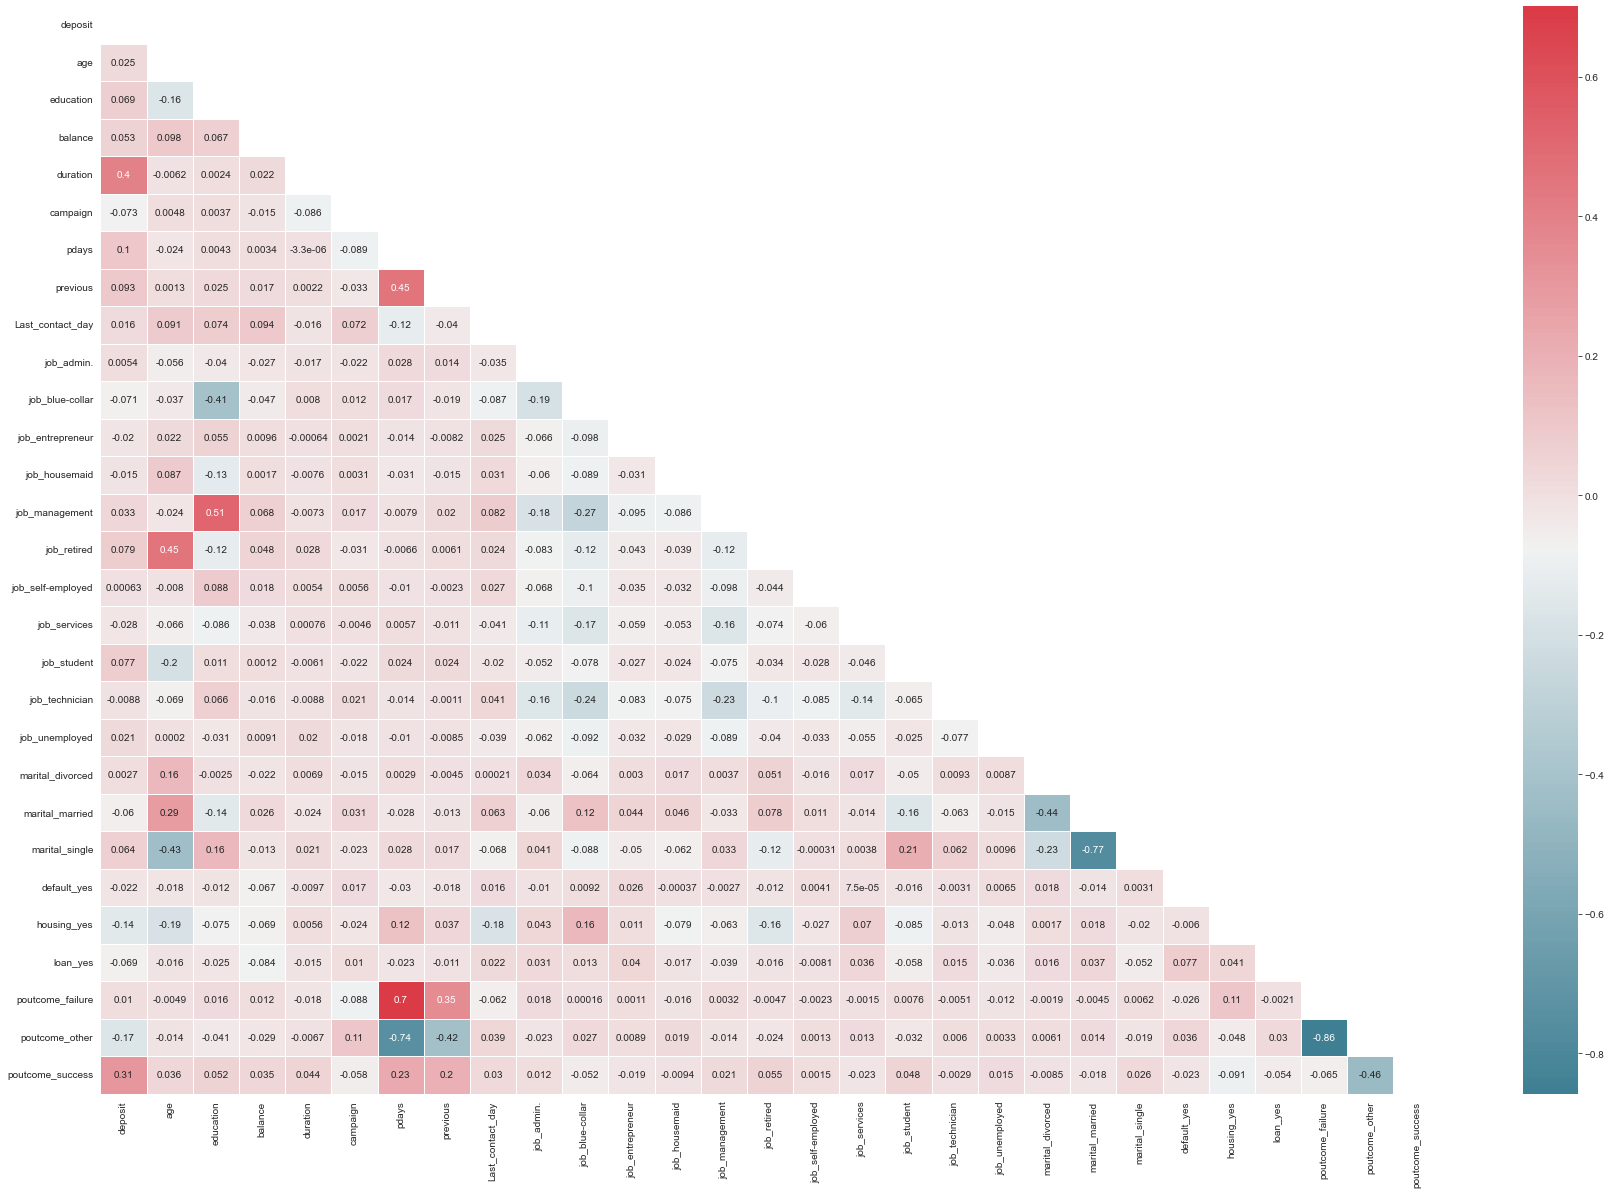

In [71]:
fig, ax = plt.subplots(figsize=(30, 20))
corr = df_dummies.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot = True, linewidth=.8, cmap=cmap, mask=mask)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_check = df_dummies.drop('deposit', axis=1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results.loc[vif_results['VIF']<=5].sort_values(by = 'VIF', ascending=False)

Feature       VIF
5              pdays  2.522079
1          education  1.714804
0                age  1.674702
6           previous  1.289736
23       housing_yes  1.158431
7   Last_contact_day  1.079812
2            balance  1.039848
24          loan_yes  1.028272
4           campaign  1.027598
22       default_yes  1.013384
3           duration  1.012848

In [73]:
cond = vif_results['VIF'] <= 5
selected_log = vif_results.loc[cond]['Feature'].tolist()
selected_log

['age',
 'education',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Last_contact_day',
 'default_yes',
 'housing_yes',
 'loan_yes']

> ***These above features will be used to develop models that are heavily affected by Multicollinearity.***

#### 3.2.1. Logistic Regression.

In [74]:
X_train_log = copy.deepcopy(X_train)
X_test_log = copy.deepcopy(X_test)

In [75]:
sc = StandardScaler()

X_train_log[selected_log] = sc.fit_transform(X_train_log[selected_log])
X_test_log[selected_log] = sc.transform(X_test_log[selected_log])

In [76]:
logr = LogisticRegression(max_iter= 1000)
logr.fit(X_train_log[selected_log], Y_train)

logr_Y_pred = logr.predict(X_test_log[selected_log])
logr_Y_proba = logr.predict_proba(X_test_log[selected_log])

In [77]:
metrics_scoring_table(logr_Y_pred,Y_test, logr_Y_proba, "LogisticRegression")

model  accuracy score  precision score  recall score  \
0  LogisticRegression        0.803872         0.345423      0.756859   

   f1-score   ROC-AUC  
0  0.474355  0.856259

#### 3.2.2. Decision Tree.

In [78]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_Y_pred = dt.predict(X_test)
dt_Y_proba = dt.predict_proba(X_test)

In [79]:
metrics_scoring_table(dt_Y_pred,Y_test, dt_Y_proba, "Decision Tree")

model  accuracy score  precision score  recall score  f1-score  \
0  Decision Tree         0.86792          0.44059      0.480605  0.459729   

    ROC-AUC  
0  0.699904

#### 3.2.3. Random Forest

In [80]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

rf_Y_pred = rf.predict(X_test)
rf_Y_proba = rf.predict_proba(X_test)

In [81]:
metrics_scoring_table(rf_Y_pred,Y_test, rf_Y_proba, "RandomForest")

model  accuracy score  precision score  recall score  f1-score  \
0  RandomForest        0.899558         0.604782      0.406812  0.486425   

    ROC-AUC  
0  0.915407

#### 3.2.4. XGB Classifier.

In [82]:
XGB = XGBClassifier()

XGB.fit(X_train, Y_train)

XGB_Y_pred = XGB.predict(X_test)
XGB_Y_proba = XGB.predict_proba(X_test)

In [83]:
metrics_scoring_table(XGB_Y_pred,Y_test, XGB_Y_proba, "XGBClassifier")

model  accuracy score  precision score  recall score  f1-score  \
0  XGBClassifier        0.904425         0.608305      0.512772  0.556468   

   ROC-AUC  
0  0.92966

#### Model Summary.

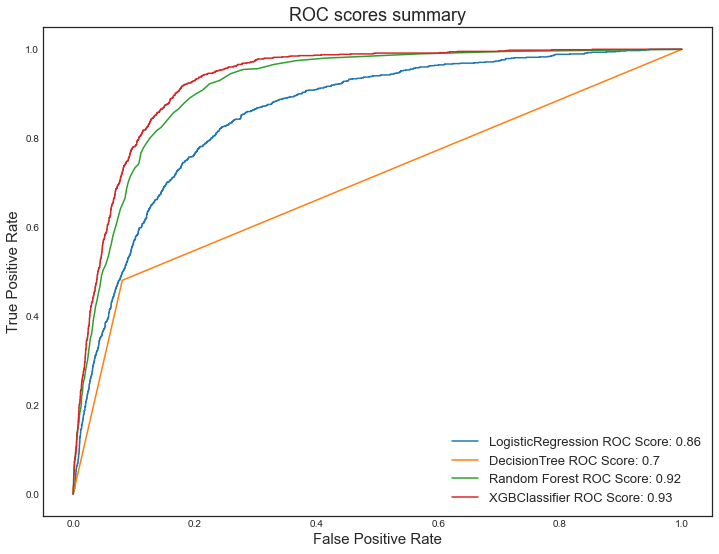

In [84]:
roc_summary_plot(Y_test, [logr_Y_proba, dt_Y_proba, rf_Y_proba, XGB_Y_proba],
                         ["LogisticRegression", "DecisionTree" ,"Random Forest", "XGBClassifier"])

In [85]:
score_1 = metrics_scoring_table(logr_Y_pred,Y_test, logr_Y_proba ,"LogisticRegression")
score_2 = metrics_scoring_table(dt_Y_pred,Y_test, dt_Y_proba ,"Decision Tree")
score_3 = metrics_scoring_table(rf_Y_pred,Y_test, rf_Y_proba ,"RandomForest")
score_4 = metrics_scoring_table(XGB_Y_pred,Y_test, XGB_Y_proba ,"XGBClassifier")
score = pd.concat([score_1,score_2,score_3,score_4], axis=0)
score

model  accuracy score  precision score  recall score  \
0  LogisticRegression        0.803872         0.345423      0.756859   
0       Decision Tree        0.867920         0.440590      0.480605   
0        RandomForest        0.899558         0.604782      0.406812   
0       XGBClassifier        0.904425         0.608305      0.512772   

   f1-score   ROC-AUC  
0  0.474355  0.856259  
0  0.459729  0.699904  
0  0.486425  0.915407  
0  0.556468  0.929660

#### <u>Comment</u>: 
We prefer to choose 2 models which have the highest F1-score and ROC score: <b>RandomForest</b> and <b>XGBClassifier</b> to continue tuning.

### 3.3. Model Tuning. <a id="3.3"></a>

#### 3.3.1. Random Forest.

In [86]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [87]:
RF_tuned = RandomForestClassifier()
grid_RF_params = {'n_estimators': np.arange(82, 90, 1), 
                  'criterion' : [ 'entropy'], 
                  'max_depth': np.arange(1,3,1), 
                  'max_features': ['sqrt']}
grid_RF_cv = GridSearchCV(RF_tuned, grid_RF_params, scoring = 'roc_auc', refit = True, cv=CV, verbose=1)  
grid_RF_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': array([1, 2]),
                         'max_features': ['sqrt'],
                         'n_estimators': array([82, 83, 84, 85, 86, 87, 88, 89])},
             scoring='roc_auc', verbose=1)

In [88]:
best_RF = grid_RF_cv.best_estimator_
best_RF.fit(X_train, Y_train)
best_rf_Y_pred = best_RF.predict(X_test)
best_rf_Y_proba = best_RF.predict_proba(X_test)

In [89]:
metrics_scoring_table(best_rf_Y_pred, Y_test, best_rf_Y_proba, "RandomForest")

model  accuracy score  precision score  recall score  f1-score  \
0  RandomForest        0.840265         0.392321      0.666982  0.494043   

    ROC-AUC  
0  0.865334

#### 3.3.2. XGB Classifier.

In [90]:
xgb_model = XGBClassifier()
XGB_parameters = {
    'n_estimators': [100, 400],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.20],
    'min_child_weight': [1, 10]
       }
grid_XGB_cv = GridSearchCV(xgb_model, XGB_parameters, cv=CV, scoring='roc_auc', verbose=1 , refit=True)
grid_XGB_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [91]:
best_XGB = grid_XGB_cv.best_estimator_
best_XGB.fit(X_train, Y_train)
best_XGB_Y_pred = best_XGB.predict(X_test)
best_XGB_Y_proba = best_XGB.predict_proba(X_test)

In [92]:
metrics_scoring_table(best_XGB_Y_pred, Y_test, best_XGB_Y_proba, "XGBClassifier")

model  accuracy score  precision score  recall score  f1-score  \
0  XGBClassifier        0.907854         0.626126      0.526017  0.571722   

    ROC-AUC  
0  0.926621

#### Model summary after tuning.

In [93]:
tune_score_1 = metrics_scoring_table(best_rf_Y_pred, Y_test, best_rf_Y_proba ,"RandomForest")
tune_score_2 = metrics_scoring_table(best_XGB_Y_pred, Y_test, best_XGB_Y_proba ,"XGBClassifier")
tune_score = pd.concat([tune_score_1,tune_score_2], axis=0)
tune_score

model  accuracy score  precision score  recall score  f1-score  \
0   RandomForest        0.840265         0.392321      0.666982  0.494043   
0  XGBClassifier        0.907854         0.626126      0.526017  0.571722   

    ROC-AUC  
0  0.865334  
0  0.926621

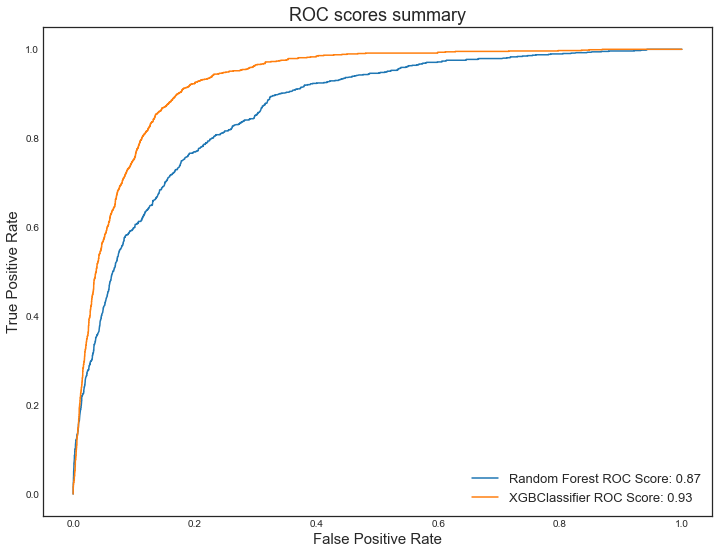

In [94]:
roc_summary_plot(Y_test, [best_rf_Y_proba, best_XGB_Y_proba],
                         ["Random Forest", "XGBClassifier"])

#### <u>Comment</u>: 
- Model <b>XGBClassifier</b> had the highest values of both ROC and F1-score.

## CONCLUSION AND RECOMMENDATIONS <a class="anchor" id="4"></a>

[0.00309837 0.00285168 0.00290929 0.03035414 0.00803795 0.00425978
 0.0030549  0.00798991 0.03909837 0.07299612 0.01263721 0.01418495
 0.05223762 0.04322445 0.02130388 0.03308867 0.04390889 0.05172633
 0.01496848 0.0257564  0.07239579 0.03025593 0.00297124 0.15397933
 0.05405908 0.0100192  0.01093272 0.17769946]


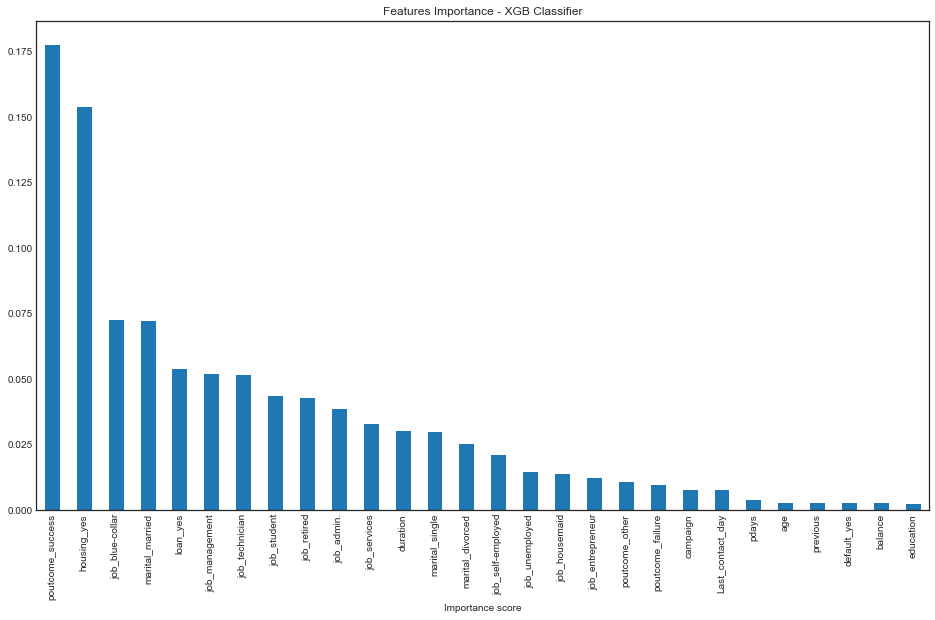

In [95]:
print(best_XGB.feature_importances_)
# plot graph of feature importances for better visualization
feat_importances = pd.Series(best_XGB.feature_importances_, index=X.columns)
plt.figure(figsize=(16, 9))
feat_importances.nlargest(len(best_XGB.feature_importances_)).plot(kind='bar')
plt.xlabel('Importance score')
plt.title('Features Importance - XGB Classifier')
plt.show()

The above figure shows the importance of each independent variables towards the target one using the model giving the best results out of the models the authors had built, <b>XGBClassifier</b>.

## Key conclusions of the research.
From the figure, we have:
- The <b>p_outcome</b> - outcome of the previous marketing campaign has the greatest influence on the current campaign's outcome.
- Whether or not the customer has <b>housing loan</b> and <b>personal loan</b> could greatly affect the campaign's outcome as well.
- The customers' <b>occupation</b> and <b>maritial status</b> are also among the factors that significantly impact the results.
- The <b>duration</b> of the last contact is also important for our prediction.

## Creative and Suitable Marketing Strategies
 **Carry out a survey on your target customer segmentation:**
If you're unsure, let's ask! A lengthy customer service survey in exchange for a gift card or other freebie might reveal a lot about your clients. Make sure to inquire about why they choose you and what they hope to see from your bank in the future. Inquire as to why they left their previous bank. Ask the tough questions and thoroughly examine the data. Then, based on the comments, create specialized bank marketing strategies.

 **Improve and Develop your current customer service:** 
It's usually more expensive to acquire new consumers than it is to retain existing customers, so think about how you may improve your retention rate and vary the services you offer to your customers. 
You can discover success in improving your overall client lifetime value on average by urging those who have a checking account to establish a brokerage account or reminding your consumers that you are available for financial aid at every major financial move (e.g. housing).

 **Personalize offers by demographic data:** 
Use public demographic information to specify your message if your bank has had success with direct mail and other direct marketing activities. People in the wealthiest area of town are unlikely to require account information, while lower-income families are unlikely to consider advanced divestment tactics.

 **Other Marketing Tactics that can be referred, but are not limited to:**
* Base on customer persona to modify marketing campaigns.
* Cooperate with other banks/companies.
* Attract online customers by retargeting advertisements.
* Delivery good contents.
* Use seperate landing page for each offer.

## REFERENCES <a class="anchor" id="5"></a>

1. A.Elsalamony, H. (2014) “Bank direct marketing analysis of data mining techniques,” <i>International Journal of Computer Applications</i>, 85(7), pp. 12–22. Available at: https://doi.org/10.5120/14852-3218. 
2. Bachmann, J.M. (2019) <i>Bank marketing campaign</i>, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit (Accessed: November 25, 2022). 
3. Deis, A. (2019) <i>Bank marketing analysis</i>, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis (Accessed: November 25, 2022). 
4. Moro, S., Cortez, P. and Rita, P. (2014) “A data-driven approach to predict the success of bank telemarketing,” <i>Decision Support Systems</i>, 62, pp. 22–31. Available at: https://doi.org/10.1016/j.dss.2014.03.001. 